In [1]:
import numpy as np
import matplotlib.pyplot as plt
from linear_models import LinearBinaryClassifier, LinearOneVsAllClassifier
from noise_functions_multi import try_region_multi
import os
%matplotlib inline

Binary 

In [2]:
binary_grad_folders = ['linear_cluster2_binary_untargeted_grad_desc_0.05_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.15_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.25_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.35_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.45_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.55_5_9',
                       'linear_cluster2_binary_untargeted_grad_desc_0.65_5_9']

binary_oracle_folders = ['linear_cluster1_binary_untargeted_oracle_0.05_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.15_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.25_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.35_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.45_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.55_5_6',
                         'linear_cluster1_binary_untargeted_oracle_0.65_5_7']

In [3]:
binary_grad_accs = []

for folder in binary_grad_folders:
    acc = np.load('experiment_results/binary_grad_results/{}/acc_history.npy'.format(folder))[-1]
    binary_grad_accs.append(acc)

In [4]:
binary_oracle_accs = []

for folder in binary_oracle_folders:
    acc = np.load('experiment_results/binary_oracle_results/{}/acc_history.npy'.format(folder))[-1]
    binary_oracle_accs.append(acc)

In [5]:
num_classifiers = 5
model_path = 'linear_models/binary'
data_path = "linear_experiments_data/binary"
binary_models = []
for i in xrange(num_classifiers):
    weights = np.load(model_path + "/" + "w_{}.npy".format(i))
    bias = np.load(model_path + "/" + "b_{}.npy".format(i))
    model = LinearBinaryClassifier(weights, bias)
    binary_models.append(model)

In [6]:
X_exp = np.load(data_path + "/" + "X_exp.npy")
Y_exp = np.load(data_path + "/" + "Y_exp.npy")

In [7]:
ensemble_weights = sum([1.0 / num_classifiers * model.weights for model in binary_models])
ensemble_bias = sum([1.0 / num_classifiers * model.bias for model in binary_models])
binary_ensemble = LinearBinaryClassifier(ensemble_weights, ensemble_bias)

In [8]:
binary_ensemble.evaluate(X_exp, Y_exp)

1.0

In [9]:
def normalize(noise, alpha):
    for i in range(noise.shape[0]):
        norm = np.linalg.norm(noise[i])
        if norm > 0:
            noise[i] = noise[i] / norm * alpha
    return noise

In [10]:
alphas = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65]
ensemble_accs = []
for alpha in alphas:
    noise_ensemble =  -1 * binary_ensemble.gradient(X_exp, Y_exp)
    noise_ensemble = normalize(noise_ensemble, alpha)
    acc = max([model.evaluate(X_exp + noise_ensemble, Y_exp) for model in binary_models])
    ensemble_accs.append(acc)

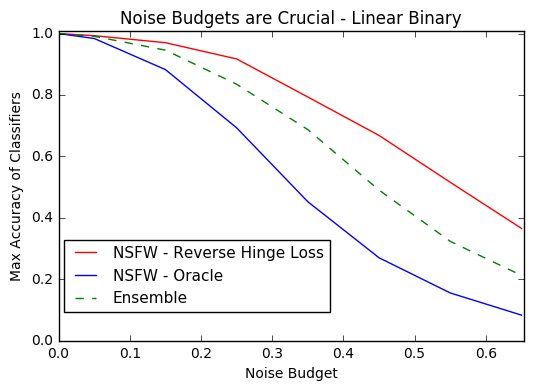

In [134]:
alphas = [0.0, 0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65]
plt.title('Noise Budgets are Crucial - Linear Binary')
plt.plot(alphas, [1.0] + binary_grad_accs, label='NSFW - Reverse Hinge Loss', color='red')
plt.plot(alphas, [1.0] + binary_oracle_accs, label='NSFW - Oracle', color='blue')
plt.plot(alphas, [1.0] + ensemble_accs, label='Ensemble', color='green', linestyle='--')
plt.xlabel('Noise Budget')
plt.ylabel('Max Accuracy of Classifiers')
plt.xlim(0,.653)
plt.ylim(0, 1.01)
plt.legend(bbox_to_anchor=(.6,.35), fontsize=11)
plt.savefig("noise_budgets_binary.png")

In [12]:
oracle_boosting_accs = np.load('experiment_results/binary_oracle_results/linear_cluster1_binary_untargeted_oracle_0.35_5_6/acc_history.npy')

In [13]:
grad_boosting_accs = np.load('experiment_results/binary_grad_results/linear_cluster2_binary_untargeted_grad_desc_0.35_5_9/acc_history.npy')

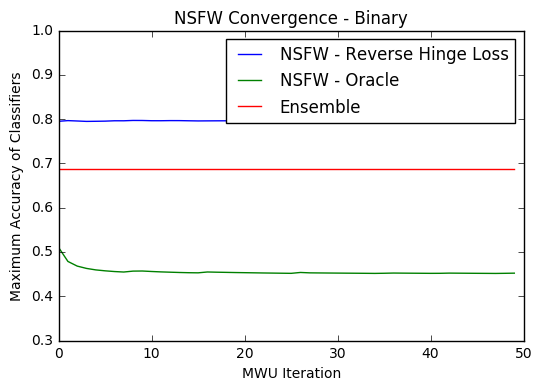

In [44]:
plt.title('NSFW Convergence - Binary')
plt.plot(range(50), grad_boosting_accs, label='NSFW - Reverse Hinge Loss')
plt.plot(range(50), oracle_boosting_accs, label='NSFW - Oracle')
plt.plot(range(50), [ensemble_accs[3]] * 50, label='Ensemble')
plt.legend()
plt.ylim(.3,1)
plt.ylabel('Maximum Accuracy of Classifiers')
plt.xlabel('MWU Iteration')

MULTI

In [121]:
multi_oracle_folders = ['linear_multirun2_multi_untargeted_oracle_0.2_5_15',
                        'linear_multirun2_multi_untargeted_oracle_0.4_5_15', 
                        'linear_multirun1_multi_untargeted_oracle_0.6_5_10',
                        'linear_multirun1_multi_untargeted_oracle_0.8_5_10',
                        'linear_multirun1_multi_untargeted_oracle_1.0_5_11']

multi_convex_folders = ['linear_multirun1_multi_untargeted_grad_desc_convex_0.2_5_9',
                        'linear_multirun1_multi_untargeted_grad_desc_convex_0.4_5_9',
                        'linear_multirun1_multi_untargeted_grad_desc_convex_0.6_5_9',
                        'linear_multirun1_multi_untargeted_grad_desc_convex_0.8_5_9',
                        'linear_multirun1_multi_untargeted_grad_desc_convex_1.0_5_9']

multi_nonconvex_folders = ['linear_multirun1_multi_untargeted_grad_desc_nonconvex_0.2_5_9',
                           'linear_multirun1_multi_untargeted_grad_desc_nonconvex_0.4_5_9',
                           'linear_multirun1_multi_untargeted_grad_desc_nonconvex_0.6_5_9',
                           'linear_multirun1_multi_untargeted_grad_desc_nonconvex_0.8_5_9',
                           'linear_multirun1_multi_untargeted_grad_desc_nonconvex_1.0_5_9']

In [122]:
multi_oracle_accs = []

for folder in multi_oracle_folders:
    acc = np.load('experiment_results/multi oracle results/{}/acc_history.npy'.format(folder))[-1]
    multi_oracle_accs.append(acc)

In [123]:
multi_convex_accs = []

for folder in multi_convex_folders:
    acc = np.load('experiment_results/multi_convex_results/{}/acc_history.npy'.format(folder))[-1]
    multi_convex_accs.append(acc)

In [124]:
multi_nonconvex_accs = []

for folder in multi_nonconvex_folders:
    acc = np.load('experiment_results/multi_nonconvex_results/{}/acc_history.npy'.format(folder))[-1]
    multi_nonconvex_accs.append(acc)

In [125]:
num_classifiers = 5
num_classes = 4
model_path = 'linear_models/multi'
data_path = "linear_experiments_data/multi"
multi_models = []
for i in xrange(num_classifiers):
    weights = np.load(model_path + "/" + "w_{}.npy".format(i))
    bias = np.load(model_path + "/" + "b_{}.npy".format(i))
    model = LinearOneVsAllClassifier(num_classes, weights, bias)
    multi_models.append(model)

In [126]:
X_exp = np.load(data_path + "/" + "X_exp.npy")
Y_exp = np.load(data_path + "/" + "Y_exp.npy")

In [127]:
ensemble_weights = sum([1.0 / num_classifiers * model.weights for model in multi_models])
ensemble_bias = sum([1.0 / num_classifiers * model.bias for model in multi_models])
multi_ensemble = LinearOneVsAllClassifier(num_classes, ensemble_weights, ensemble_bias)

In [128]:
multi_ensemble.evaluate(X_exp, Y_exp)

1.0

In [129]:
def optUntargetedNoiseMulti(model, X, Y, alpha, num_labels):
    n = X.shape[0]
    noise = []
    # iterate over all points
    for i in xrange(n):
        label_options = range(num_labels)
        del label_options[Y[i]]
        v_options = []
        # iterate over all label options
        for j in label_options:
            v = try_region_multi([model], [j], X[i])
            if v is None:
                v = np.zeros(784)
            norm = np.linalg.norm(v)
            v_options.append((norm, v))
        min_v = min(v_options, key=lambda x:x[0])
        if min_v[0] < alpha:
            res = min_v[1]
        else:
            res = np.zeros(28*28)
        noise.append(res)
    return np.array(noise)

In [130]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
multi_ensemble_accs = []
multi_ensemble_noise = []
for alpha in alphas:
    ensemble_noise = optUntargetedNoiseMulti(multi_ensemble, X_exp, Y_exp, alpha, num_classes)
    ensemble_noise = normalize(ensemble_noise, alpha)
    multi_ensemble_noise.append(ensemble_noise)
    acc = max([model.evaluate(X_exp + ensemble_noise, Y_exp) for model in multi_models])
    multi_ensemble_accs.append(acc)

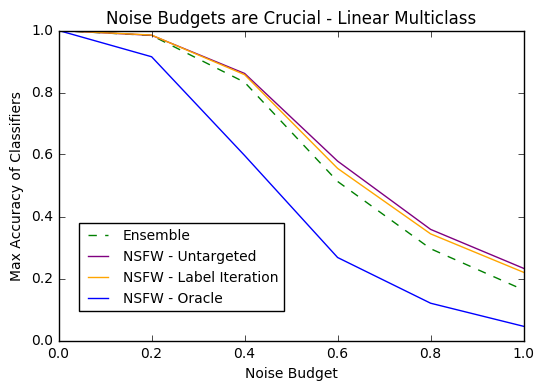

In [131]:
plt.title('Noise Budgets are Crucial - Linear Multiclass')
plt.plot([0.0] + alphas, [1.0] + multi_ensemble_accs, label='Ensemble', color='green', linestyle='--')
plt.plot([0.0] + alphas, [1.0] + multi_nonconvex_accs, label="NSFW - Untargeted", color='purple')
plt.plot([0.0] + alphas, [1.0] + multi_convex_accs, label='NSFW - Label Iteration', color='orange')
plt.plot([0.0] + alphas, [1.0] + multi_oracle_accs, label='NSFW - Oracle', color='blue')
plt.legend(bbox_to_anchor=(.5,.40), fontsize=10)
plt.xlabel('Noise Budget')
plt.ylabel('Max Accuracy of Classifiers')
plt.savefig('noise_budgets_multiclass_crucial.png')

In [26]:
convex_acc = np.load('experiment_results/multi_convex_results/linear_multirun1_multi_untargeted_grad_desc_convex_0.6_5_9/acc_history.npy'.format(folder))
nonconvex_acc = np.load('experiment_results/multi_nonconvex_results/linear_multirun1_multi_untargeted_grad_desc_nonconvex_0.6_5_9/acc_history.npy'.format(folder))
oracle_acc = np.load('experiment_results/multi oracle results/linear_multirun1_multi_untargeted_oracle_0.6_5_10/acc_history.npy'.format(folder))

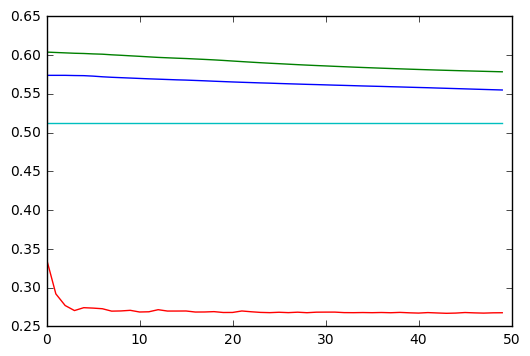

In [29]:
plt.plot(range(50), convex_acc)
plt.plot(range(50), nonconvex_acc)
plt.plot(range(50), oracle_acc)
plt.plot(range(50), [multi_ensemble_accs[2]] * 50)

In [110]:
generalization_models = []
num_classifiers = 50
model_path_generalization = 'experiment_results/generalization_experiment/models'
for i in xrange(num_classifiers):
    weights = np.load(model_path_generalization + "/" + "w_{}.npy".format(i))
    bias = np.load(model_path_generalization + "/" + "b_{}.npy".format(i))
    model = LinearOneVsAllClassifier(num_classes, weights, bias)
    generalization_models.append(model)

In [111]:
gen_X = np.load('experiment_results/generalization_experiment/data/X_exp.npy')
gen_Y = np.load('experiment_results/generalization_experiment/data/Y_exp.npy')

In [112]:
min([model.evaluate(gen_X, gen_Y) for model in generalization_models])

1.0

In [117]:
generalization_noise = []
ks = [1,5,10,20,30,40,50]
for k in ks:
    noise = np.load('experiment_results/generalization_experiment/results/noise_{}.npy'.format(k))
    generalization_noise.append(noise)

In [115]:
generalization_accs = []
for noise in generalization_noise:
    accs = []
    for V in noise:
        acc = [model.evaluate(X_exp + V, Y_exp) for model in generalization_models]
        accs.append(acc)
    generalization_accs.append(max(np.mean(np.array(accs), axis=0)))

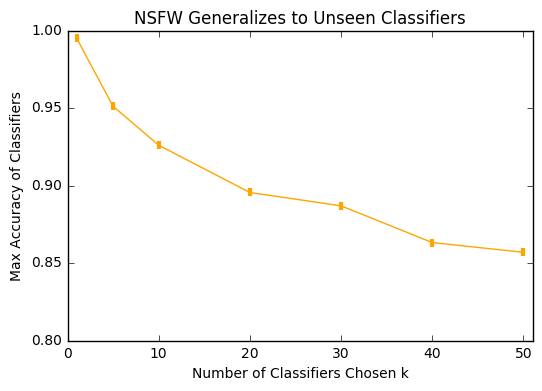

In [119]:
plt.plot(ks, generalization_accs, color='orange', marker='|', markeredgewidth=3)
plt.ylim(.8,1)
plt.xlim(0,51)
plt.title('NSFW Generalizes to Unseen Classifiers')
plt.ylabel('Max Accuracy of Classifiers')
plt.xlabel("Number of Classifiers Chosen k")
plt.savefig("generalization_experiment.png")